In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
img_x, img_y = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential

In [16]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [27]:
history = AccuracyHistory()

In [28]:
batch_size = 128
epochs = 5

In [29]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 113s - loss: 0.1488 - acc: 0.9552 - val_loss: 0.0389 - val_acc: 0.9883
Epoch 2/5
60000/60000 [==============================] - 114s - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0315 - val_acc: 0.9899
Epoch 3/5
60000/60000 [==============================] - 108s - loss: 0.0266 - acc: 0.9913 - val_loss: 0.0288 - val_acc: 0.9906
Epoch 4/5
60000/60000 [==============================] - 108s - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0552 - val_acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 112s - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0348 - val_acc: 0.9880


Test loss: 0.0348480271366
Test accuracy: 0.988


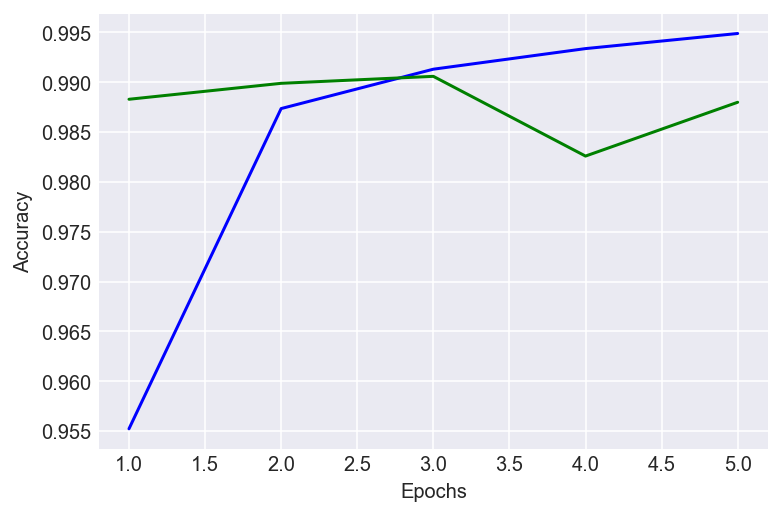

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
sns.set_style("darkgrid")
plt.plot(range(1, 6), history.train_acc, 'b')
plt.plot(range(1, 6), history.val_acc, 'g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [37]:
model.predict(x_test[0:1])

array([[  6.81917717e-11,   1.02628628e-09,   2.15623910e-08,
          1.39322438e-08,   4.32589728e-13,   4.46394414e-11,
          4.78047904e-15,   9.99999881e-01,   7.42294726e-10,
          6.96626898e-08]], dtype=float32)

In [38]:
np.argmax(model.predict(x_test[30:31]))

3

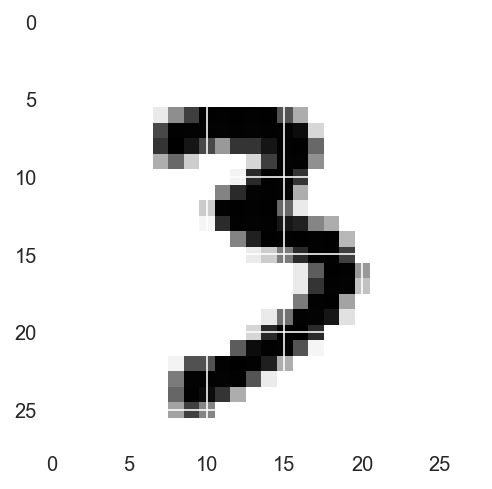

In [39]:
plt.gray()
plt.imshow(1 - x_test[30:31].reshape([28, 28]))

In [32]:
model.save('mnist_model.hdf5')

In [33]:
from keras.models import load_model
loaded_model = load_model('mnist_model.hdf5')

In [37]:
x_test[0:1].shape

(1, 28, 28, 1)

In [35]:
np.argmax(loaded_model.predict(x_test[0:1]))

7

## Baseline

In [2]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = mnist.load_data()
print(x_train_2.shape)
print(x_test_2.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train_2 = x_train_2.reshape(x_train_2.shape[0], -1)
x_test_2 = x_test_2.reshape(x_test_2.shape[0], -1)
print(x_train_2.shape)
print(x_test_2.shape)

(60000, 784)
(10000, 784)


In [9]:
x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')
x_train_2 /= 255
x_test_2 /= 255

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [10]:
clf = SGDClassifier(max_iter=10)
clf.fit(x_train_2, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
y_pred = clf.predict(x_test_2)
print(accuracy_score(y_test_2, y_pred))

0.8897
